## Mask R-CNN - Inspect Weights of a Trained Model

This notebook includes code and visualizations to test, debug, and evaluate the Mask R-CNN model.

In [11]:
import os
import sys
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import keras

# Root directory of the project
ROOT_DIR = os.path.abspath("../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")

Trained_model_weights = os.path.join(ROOT_DIR, "mask_rcnn_iceshiptf1config_0050.h5")
dataset_dir=ROOT_DIR+"\\IceData\\NRC_data_multi_stage_big" ##change to correct data dir depending what youre looking to do
DEFAULT_LOGS_DIR = ROOT_DIR+"\\.logs"

## Configurations

In [12]:
from mrcnn.config import Config
class IceConfig(Config):
    """Configuration for training on the toy  dataset.
    Derives from the base Config class and overrides some values.
    """
    # Give the configuration a recognizable name
    # NAME = 'mrcnntf114_big' #var dont change
    NAME='IceShipTF1Config'
    IMAGES_PER_GPU = 1
    NUM_CLASSES = 1 + 1 + 1 # Background + Ice + Ship
    STEPS_PER_EPOCH = 200 #100
    DETECTION_MIN_CONFIDENCE = 0.9
    IMAGE_MAX_DIM=1024

config=IceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                15
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

## Notebook Preferences

In [13]:
# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/gpu:0"  # /cpu:0 or /gpu:0

In [14]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

## Load Model

In [15]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)

weights_path = Trained_model_weights

# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

Loading weights  c:\Users\logan\Desktop\MEng\Mask_RCNN\mask_rcnn_iceshiptf1config_0050.h5


## Review Weight Stats

In [16]:
# Show stats of all trainable weights    
visualize.display_weight_stats(model)

WEIGHT NAME,SHAPE,MIN,MAX,STD
conv1_1/kernel:0,"(7, 7, 3, 64)",-0.8546,+0.8473,+0.1305
conv1_1/bias:0,"(64,)",-0.0001,+0.0001,+0.0000
bn_conv1_1/gamma:0,"(64,)",+0.0835,+2.6244,+0.5057
bn_conv1_1/beta:0,"(64,)",-2.3942,+5.3658,+1.9789
bn_conv1_1/moving_mean:0,"(64,)",-172.9685,+94.5717,+42.0063
bn_conv1_1/moving_variance:0*** Overflow?,"(64,)",+0.0000,+110557.9688,+16228.7607
res2a_branch2a_1/kernel:0,"(1, 1, 64, 64)",-0.6536,+0.3163,+0.0762
res2a_branch2a_1/bias:0,"(64,)",-0.0008,+0.0029,+0.0007
bn2a_branch2a_1/gamma:0,"(64,)",+0.2169,+1.8489,+0.4113
bn2a_branch2a_1/beta:0,"(64,)",-2.1180,+3.7337,+1.1790


# Histograms of Weights

TODO: cleanup this part

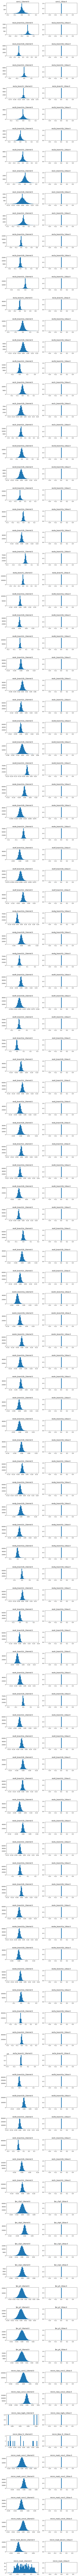

In [17]:
# Pick layer types to display
LAYER_TYPES = ['Conv2D', 'Dense', 'Conv2DTranspose']
# Get layers
layers = model.get_trainable_layers()
layers = list(filter(lambda l: l.__class__.__name__ in LAYER_TYPES, 
                layers))
# Display Histograms
fig, ax = plt.subplots(len(layers), 2, figsize=(10, 3*len(layers)),
                       gridspec_kw={"hspace":1})
for l, layer in enumerate(layers):
    weights = layer.get_weights()
    for w, weight in enumerate(weights):
        tensor = layer.weights[w]
        ax[l, w].set_title(tensor.name)
        _ = ax[l, w].hist(weight[w].flatten(), 50)
